<a href="https://colab.research.google.com/github/derricknguyen12/COGS108_Repo/blob/main/MyCSE151A_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 1

In [1]:
!git clone https://github.com/ucsd-cse151a-ss124/hw1.git

fatal: destination path 'hw1' already exists and is not an empty directory.


In this assignment, we will be exploring the car dataset and analyzing their fuel efficiency. <br >
Specifically, we will do some exploratory analysis with visualizations, then we will build a model for Simple Linear Regression, a model for Polynomial Regression, and one model for Logistic Regression. <br >
**The given dataset is already modified and cleaned**, but you can find [the original information here.](https://archive.ics.uci.edu/ml/datasets/auto+mpg).

## Dataset Attribute Information

1. **mpg**: Miles per gallon. This is one primary measurement for car fuel efficiency.
2. **displacement** : The cylinder volumes in cubic inches.
3. **horsepower** : Engine power.
4. **weight** : In pounds.
5. **acceleration** : The elapsed time in seconds to go from 0 to 60mph.
6. **origin** : Region of origin.

### Libraries that can be used: numpy, pandas, scikit-learn, seaborn, plotly, matplotlib
Any libraries used in the discussion materials are also allowed.

#### Other Notes
 - Don't worry about not being able to achieve high accuracy, it is neither the goal nor the grading standard of **this** assignment. <br >
 - If not specified, you are not required to do hyperparameter tuning, but feel free to do so if you'd like.
 - Discussion materials should be helpful for doing the assignments.

# Exercises
## Exercise 1 - Exploratory Analysis (20 points in total)

### Exercise 1.1 - Correlation Matrix (10 points)
Generate a Pearson [correlation matrix plot](https://heartbeat.fritz.ai/seaborn-heatmaps-13-ways-to-customize-correlation-matrix-visualizations-f1c49c816f07) in the form of a heatmap. See the link to have an idea about what this visualization should look like. <br >
After generating the plot, answer the following question: <br >
**If we are going to predict ``mpg`` in Simple Linear Regression(i.e., $y=ax+b$), which attribute are you most UNLIKELY to pick as the independent variable? Explain why.**

Requirements & notes
 - When computing correlation, make sure to drop the column ``origin`` to avoid errors.
 - The computed correlation values should be shown on the plot.
 - Use a diverging color scale with the color range being \[-1, 1\] and center being 0 (if applicable).

In [12]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

auto_df = pd.read_csv('/content/hw1/auto-mpg.csv')
auto_df = auto_df.drop(columns=['origin'])
auto_df.head()

,mpg,displacement,horsepower,weight,acceleration
0,18.0,307.0,130.0,3504.0,12.0
1,15.0,350.0,165.0,3693.0,11.5
2,18.0,318.0,150.0,3436.0,11.0
3,16.0,304.0,150.0,3433.0,12.0
4,17.0,302.0,140.0,3449.0,10.5


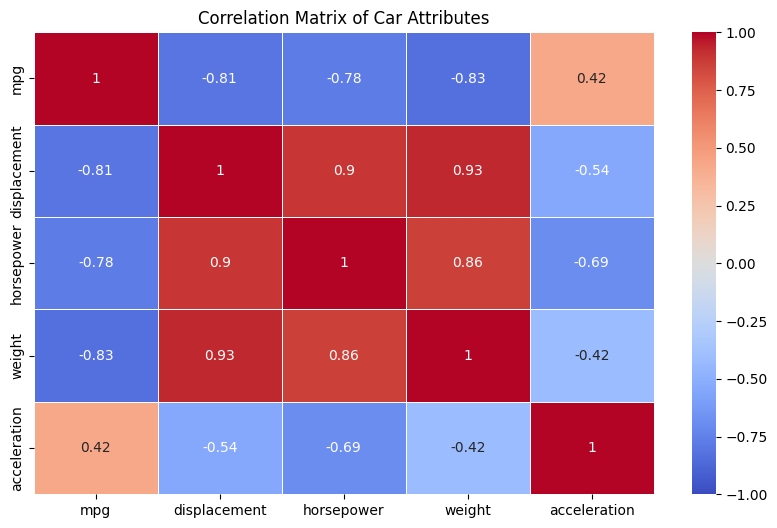

In [3]:
correlation_matrix = auto_df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, linewidths=.5)

plt.title('Correlation Matrix of Car Attributes')
plt.show()

**Answer:**
The attribute that I would most likely not pick as an independent variable to mpg is `acceleration` because it has the lowest correlation since it is the closest to 0 from the other attributes to mpg and that which means that acceleration has the least amount of impact on mpg and that it is a poor predictor for linear regression.



### Exercise 1.2 - Pairplot (10 points)
Generate a pairplot(a.k.a. scatter plot matrix) of the given dataset. <br >
After generating the plot, answer the following question: <br >
**If we are using ``horsepower`` to predict ``mpg``, which method could lead to the best performance? (Linear Regression, Polynomial Regression, or Logistic Regression) Explain why.**

Note that there is no requirement on the diagonals. You can leave empty or use other representations based on your preference. However, having ``origin``-based grouped data distributions on the diagonals effectively helps you answer some questions in the later exercises.   

Requirements
 - The points should be colored based on the column ``origin``.

In [4]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

auto_df = pd.read_csv('/content/hw1/auto-mpg.csv')
auto_df['origin'] = auto_df['origin'].astype('category')
auto_df.head()

,mpg,displacement,horsepower,weight,acceleration,origin
0,18.0,307.0,130.0,3504.0,12.0,USA
1,15.0,350.0,165.0,3693.0,11.5,USA
2,18.0,318.0,150.0,3436.0,11.0,USA
3,16.0,304.0,150.0,3433.0,12.0,USA
4,17.0,302.0,140.0,3449.0,10.5,USA


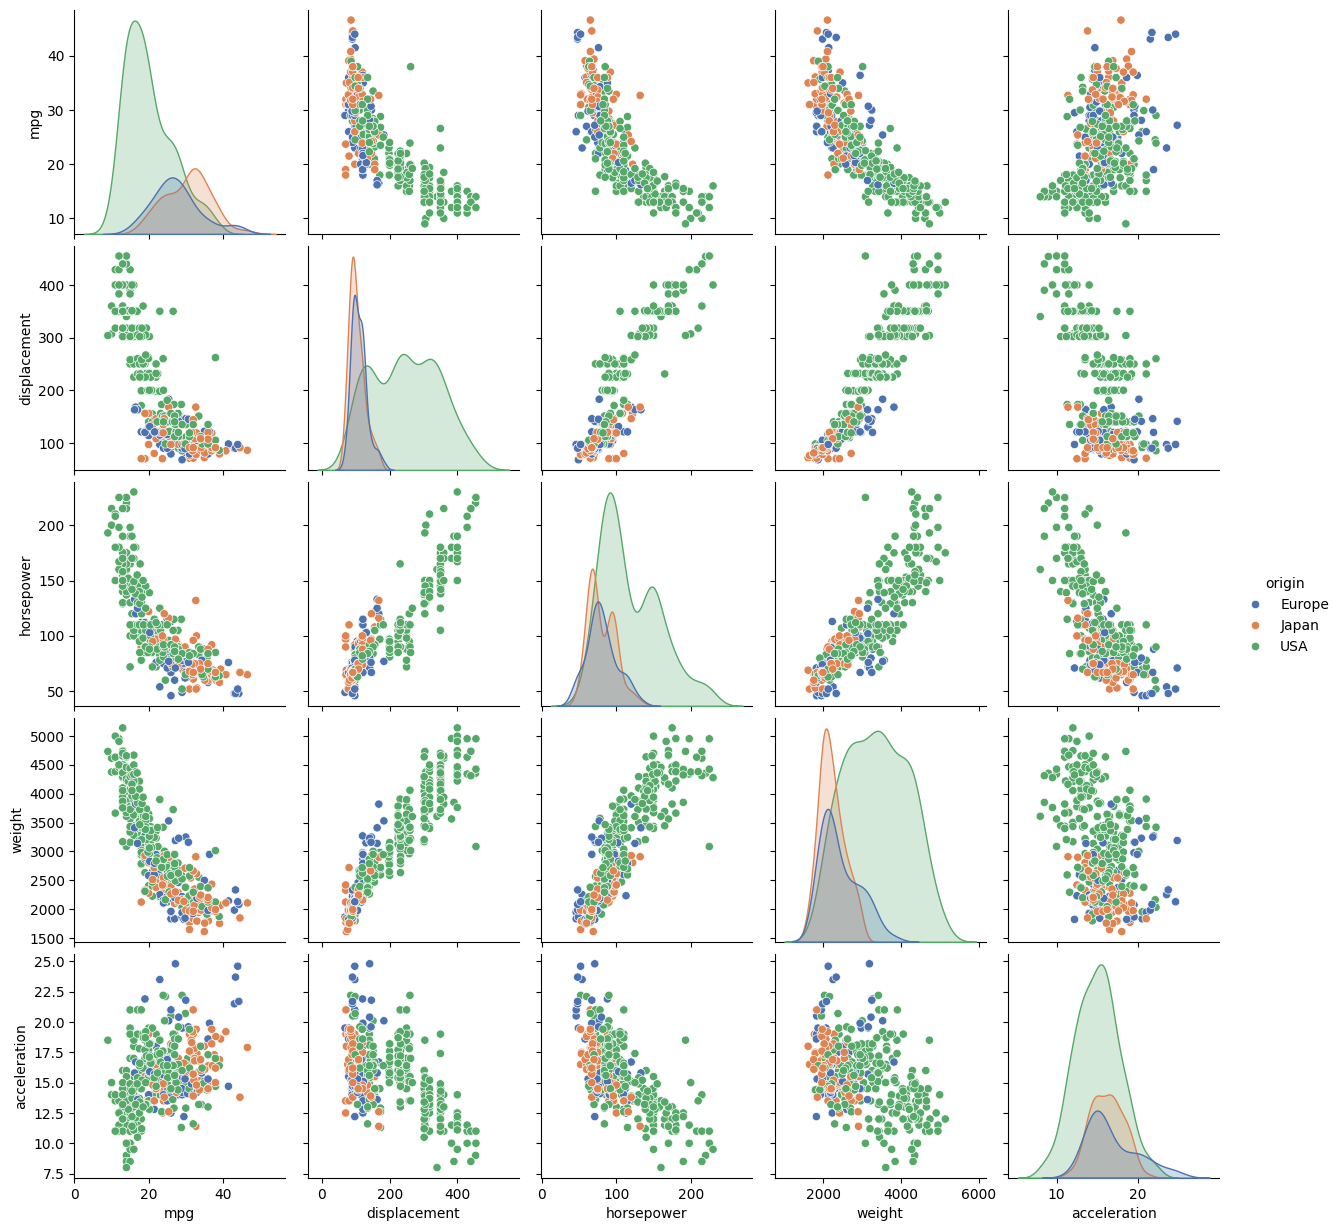

In [5]:
sns.pairplot(auto_df, hue='origin', palette='deep')
plt.show()

**Answer:**
Polynomial Regression could lead to the best performance because by looking at the graph, there is a curvature in the data and is not linear or classified data that is everywhere.


## Exercise 2 - Linear and Polynomial Regression (40 points in total)

### Exercise 2.1 - Splitting Dataset (5 points)
Split the data into training and testing set with the ratio of 80:20.

Print the shapes of the training and testing set.

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

auto_df = pd.read_csv('/content/hw1/auto-mpg.csv')
auto_df = auto_df.drop(columns=['origin'])
auto_df.head()

,mpg,displacement,horsepower,weight,acceleration
0,18.0,307.0,130.0,3504.0,12.0
1,15.0,350.0,165.0,3693.0,11.5
2,18.0,318.0,150.0,3436.0,11.0
3,16.0,304.0,150.0,3433.0,12.0
4,17.0,302.0,140.0,3449.0,10.5


In [7]:
X = auto_df[['horsepower']]
y = auto_df['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (313, 1)
Testing set shape: (79, 1)


### Exercise 2.2 - Simple Linear Regression (10 points)
Using one of the other attributes(excluding ``origin``) by your choice, please build a simple linear regression model that predicts ``mpg``. <br >

Requirements
 - Report the testing MSE error.

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

reg = LinearRegression()
regmodel = reg.fit(X_train, y_train)

yhat_test = reg.predict(X_test)

print('\nMean squared error: %.2f' % mean_squared_error(y_test, yhat_test))


Mean squared error: 23.20


### Exercise 2.3 - Polynomial Regression (25 points)
Build polynomial regression models that predict ``mpg`` with the same choice in 2.2. <br >
Specifically, from degree=2 to degree=4, build one respectively. <br >
Then, based on the reported errors from only these three degrees, **do you think there is a sign of overfitting? Provide your reasoning.**


Requirements
 - Report the training MSE error for each of the three degrees.
 - Report the testing MSE error for each of the three degrees.


In [9]:
import operator
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures


x = auto_df[['horsepower']]
y = auto_df['mpg']
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)

x_poly_train = x_poly[:-20]
y_train = y[:-20]

x_poly_test = x_poly[-20:]
y_test = y[-20:]

model = LinearRegression()
model.fit(x_poly_train, y_train)
yhat_train_pred = model.predict(x_poly_train)
yhat_test_pred = model.predict(x_poly_test)

mse = mean_squared_error(y_train,yhat_train_pred)
mse = mean_squared_error(y_test,yhat_test_pred)


print('Training MSE for degree = 2: %8.15f' % mse)
print('Testing MSE for degree = 2: %8.15f' % mse)

Training MSE for degree = 2: 43.842707686480722
Testing MSE for degree = 2: 43.842707686480722


In [10]:
import operator
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures


x = auto_df[['horsepower']]
y = auto_df['mpg']
polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(x)

x_poly_train = x_poly[:-20]
y_train = y[:-20]

x_poly_test = x_poly[-20:]
y_test = y[-20:]

model = LinearRegression()
model.fit(x_poly_train, y_train)
yhat_train_pred = model.predict(x_poly_train)
yhat_test_pred = model.predict(x_poly_test)

mse = mean_squared_error(y_train,yhat_train_pred)
mse = mean_squared_error(y_test,yhat_test_pred)

print('Training MSE for degree = 3: %8.15f' % mse)
print('Testing MSE for egree = 3: %8.15f' % mse)

Training MSE for degree = 3: 44.215837361538455
Testing MSE for egree = 3: 44.215837361538455


In [11]:
import operator
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures


x = auto_df[['horsepower']]
y = auto_df['mpg']
polynomial_features= PolynomialFeatures(degree=4)
x_poly = polynomial_features.fit_transform(x)

x_poly_train = x_poly[:-20]
y_train = y[:-20]

x_poly_test = x_poly[-20:]
y_test = y[-20:]

model = LinearRegression()
model.fit(x_poly_train, y_train)
yhat_train_pred = model.predict(x_poly_train)
yhat_test_pred = model.predict(x_poly_test)

mse = mean_squared_error(y_train,yhat_train_pred)
mse = mean_squared_error(y_test,yhat_test_pred)

print('Training MSE for degree = 4: %8.15f' % mse)
print('Testing MSE for egree = 4: %8.15f' % mse)

Training MSE for degree = 4: 43.695490822045386
Testing MSE for egree = 4: 43.695490822045386


**Answer:**

No because both the training and testing values for degree 2,3, and 4, are all about the same number, so that means that the model is working really well and capturing all of the data, and that there is little error.

## Exercise 3 - Logistic Regression (35 points in total)

Now we are going to build a classification model on ``origin`` using all the other 5 attributes. <br >
Note that Logistic Regression is a binary classificaiton algorithm.

### Exercise 3.1 - Processing and Splitting the Dataset (5 points)
In this exercise 3, we only consider those observations where they originate from either "USA" or "Japan". <br >
So please **remove** those observations that originate from "Europe". <br >
And then, split the data into training and testing set with the ratio of 80:20. <br >

Print the shapes and the unique values of the training and testing set


In [19]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


auto_df = pd.read_csv('/content/hw1/auto-mpg.csv')
auto_df['origin'] = auto_df['origin'].astype('category')
auto_df = auto_df[auto_df['origin'] != 'Europe']
auto_df.head()

X = auto_df[['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']]
y = auto_df['origin']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

print("Training set shape:", y_train.shape)
print("Testing set shape:", y_test.shape)

Training set shape: (259, 5)
Testing set shape: (65, 5)
Training set shape: (259,)
Testing set shape: (65,)


### Exercise 3.2 - Logistic Regression (20 points)

Using all the other 5 attributes, please build a Logistic Regression model that distinguishes between cars from Japan and cars from the USA. <br><br>
Now, given the results from models and plots from the previous questions, what do you think a hypothetical model would look like (in terms of accuracy) **if we are distinguishing between Japan and Europe** (instead of Japan and USA)? What would change if anything? Provide your reasoning in the text box below. Feel free to make comparisons based on your previous observations and results.

Requirements
 - Report the testing precision and recall for both regions for the Japan vs. USA model.
 - Provide reasoning for potential difference in accuracy when comparing Japanese and European cars

In [29]:
from sklearn.metrics import classification_report

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

yhat_test = logreg.predict(X_test)
yhat_train = logreg.predict(X_train)

logreg.score(X_test, y_test)
logreg.score(X_train, y_train)

print(classification_report(y_test, yhat_test))

              precision    recall  f1-score   support

       Japan       0.81      0.62      0.70        21
         USA       0.84      0.93      0.88        44

    accuracy                           0.83        65
   macro avg       0.82      0.78      0.79        65
weighted avg       0.83      0.83      0.82        65



**Answer:**

If we were distinguishing between Japan and Europe instead, the precision and recall for both regions might be lower than comparing Japan and USA cars since Japan and European cars are a lot more similar than USA to Japan cars which also means a lower accuracy.

### Exercise 3.3 - Model coefficients (10 points)

Using all the attributes used in 3.2, plot the model coefficients in a scatter plot as shown in class. Explain the contribution of the top 3 coefficients, and interpret their meaning and their contribution to the $\hat{y}$ prediction. Example can be found [here](https://quantifyinghealth.com/interpret-logistic-regression-coefficients/)

<Axes: >

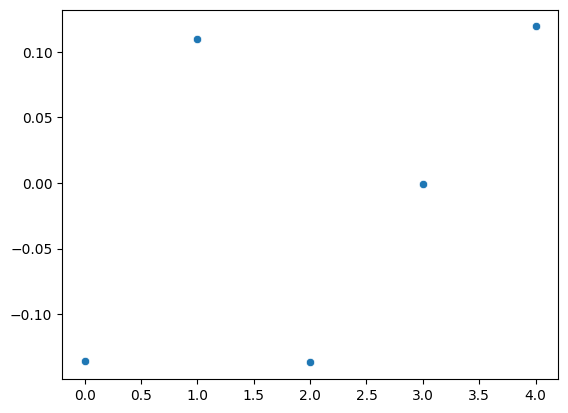

In [31]:
logreg.coef_[0]
sns.scatterplot(x = list(range(0,len(logreg.coef_[0]))),y = logreg.coef_[0])

**Answer:**

From the top 3 coefficients I can see which features are most influential in predicting the car's origin. The top 3 coefficients give us an idea of which characteristics are most associated with cars from USA or Japan. Acceleration: Since the coefficient for acceleration is positive, it indicates that higher acceleration values are more likely to be associated with cars from the USA.
MPG: Since the coefficient is negative, it would indicate that higher mpg values (better fuel efficiency) are more likely to be associated with American cars. Horsepower: Since the coefficient is negative, then higher horsepower is more likely to be associated with Japanese cars.

## Exercise 4 - Collaborative Statement (5 points)

It is mandatory to include a Statement of Collaboration in each submission, that follows the guidelines below.
Include the names of everyone involved in the discussions (especially in-person ones), and what was discussed.
All students are required to follow the academic honesty guidelines posted on the course website. For
programming assignments in particular, I encourage students to organize (perhaps using Piazza) to discuss the
task descriptions, requirements, possible bugs in the support code, and the relevant technical content before they
start working on it. However, you should not discuss the specific solutions, and as a guiding principle, you are
not allowed to take anything written or drawn away from these discussions (no photographs of the blackboard,
written notes, referring to Piazza, etc.). Especially after you have started working on the assignment, try to restrict
the discussion to Piazza as much as possible, so that there is no doubt as to the extent of your collaboration.

I didn't collaborate with anyone on this assignment and completed it by myself.

In [37]:
!pip install nbconvert

In [38]:
!apt-get install pandoc
!apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic -y

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libcmark-gfm-extensions0.29.0.gfm.3 libcmark-gfm0.29.0.gfm.3 pandoc-data
Suggested packages:
  texlive-latex-recommended texlive-xetex texlive-luatex pandoc-citeproc texlive-latex-extra
  context wkhtmltopdf librsvg2-bin groff ghc nodejs php python ruby libjs-mathjax libjs-katex
  citation-style-language-styles
The following NEW packages will be installed:
  libcmark-gfm-extensions0.29.0.gfm.3 libcmark-gfm0.29.0.gfm.3 pandoc pandoc-data
0 upgraded, 4 newly installed, 0 to remove and 49 not upgraded.
Need to get 20.6 MB of archives.
After this operation, 156 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libcmark-gfm0.29.0.gfm.3 amd64 0.29.0.gfm.3-3 [115 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libcmark-gfm-extensions0.29.0.gfm.3 amd64 0.29.0.gfm.3-3 [25.1 kB]


In [46]:
!jupyter nbconvert --to pdf MyCSE151A_HW1.ipynb

[NbConvertApp] WARNING | pattern 'MyCSE151A_HW1.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
 